In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
import re
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

## Importing the Data

In [2]:
# importing dataset
df = pd.read_csv('Scrapper/final.csv', header=None)
df.rename(columns={0: 'comment', 1: 'category'}, inplace=True)

## Exploring the Data

In [3]:
df.head()

,comment,category
0,Love you sir!!,positive
1,Please make videos on..Midpoint circle drawing...,imperative
2,I bought both of your courses on Udemy. You ar...,interrogative
3,"Thank you very much, u really got me in the fi...",positive
4,i hope u are ok with everything going on again...,other


In [4]:
# dimension of the dataset
df.shape

(1254, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254 entries, 0 to 1253
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   comment   1254 non-null   object
 1   category  1254 non-null   object
dtypes: object(2)
memory usage: 19.7+ KB


In [6]:
df.describe()

,comment,category
count,1254,1254
unique,1233,6
top,Thanks sir,positive
freq,4,597


In [7]:
# unique categories
df['category'].unique()

array(['positive', 'imperative', 'interrogative', 'other', 'correction',
       'negative'], dtype=object)

In [8]:
lens = df.comment.str.len()
lens.mean(), lens.std(), lens.max()

(78.71610845295056, 80.77148425825247, 823)

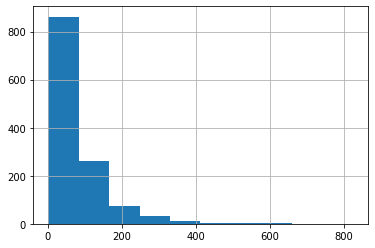

In [9]:
lens.hist();

## Preprocessing

In [10]:
# lowercasing
df['comment'] = df['comment'].str.lower()
df['comment']

0                                          love you sir!!
1       please make videos on..midpoint circle drawing...
2       i bought both of your courses on udemy. you ar...
3       thank you very much, u really got me in the fi...
4       i hope u are ok with everything going on again...
                              ...                        
1249      sir could you please post all the videos on c++
1250    sir ,after in  part 2 u discussed about file e...
1251    sir please post more videos on functions and p...
1252    please post operator concept videos like post ...
1253                                    thank you sir..!!
Name: comment, Length: 1254, dtype: object

In [11]:
# checking for NaN values
df.isnull().sum()

comment     0
category    0
dtype: int64

There is no **NaN** value in the dataset.

In [12]:
# checking for duplicate 
df.duplicated().any()

True

Duplicate row is present. Let's remove the duplicate rows.

In [13]:
# removing duplicate rows
df = df.drop_duplicates()
df.duplicated().any()

False

Duplicated removed succefully.

In [14]:
# removing URLs
df['comment'] = df['comment'].str.replace('http\S+|www.\S+', '', case=False)
df

,comment,category
0,love you sir!!,positive
1,please make videos on..midpoint circle drawing...,imperative
2,i bought both of your courses on udemy. you ar...,interrogative
3,"thank you very much, u really got me in the fi...",positive
4,i hope u are ok with everything going on again...,other
...,...,...
1249,sir could you please post all the videos on c++,interrogative
1250,"sir ,after in part 2 u discussed about file e...",interrogative
1251,sir please post more videos on functions and p...,imperative
1252,please post operator concept videos like post ...,imperative


In [15]:
# removing commas "\n"
df['comment'] = df['comment'].replace('\n','', regex=True)
df

,comment,category
0,love you sir!!,positive
1,please make videos on..midpoint circle drawing...,imperative
2,i bought both of your courses on udemy. you ar...,interrogative
3,"thank you very much, u really got me in the fi...",positive
4,i hope u are ok with everything going on again...,other
...,...,...
1249,sir could you please post all the videos on c++,interrogative
1250,"sir ,after in part 2 u discussed about file e...",interrogative
1251,sir please post more videos on functions and p...,imperative
1252,please post operator concept videos like post ...,imperative


In [16]:
# removing punctuations except ! and ?
# import string

# def remove_punctuations(text):
    
#     punct = string.punctuation
#     punct = punct.replace('!', '')
#     punct = punct.replace('?', '')
    
#     for punctuation in punct:
#         text = text.replace(punctuation, '')
#     return text

# df["comment"] = df['comment'].apply(remove_punctuations)
# df

# removing all punctuations
df["comment"] = df['comment'].str.replace('[^\w\s]','')
df

,comment,category
0,love you sir,positive
1,please make videos onmidpoint circle drawing a...,imperative
2,i bought both of your courses on udemy you are...,interrogative
3,thank you very much u really got me in the fir...,positive
4,i hope u are ok with everything going on again...,other
...,...,...
1249,sir could you please post all the videos on c,interrogative
1250,sir after in part 2 u discussed about file ex...,interrogative
1251,sir please post more videos on functions and p...,imperative
1252,please post operator concept videos like post ...,imperative


In [17]:
# # replacing sequence of "!" with single "!"
# def replace(string, char): 
#     pattern = char + '{2,}'
#     string = re.sub(pattern, char, string)
#     return string 

# char = '!'

# df_ = pd.DataFrame(columns=['comment', 'category'])

# for index, row in df.iterrows():
#     df_ = df_.append({'comment':replace(row['comment'], char), 'category':row['category']}, ignore_index=True)

# df_

In [18]:
# # replacing sequence of "?" with single "?"
# def replace_q(string):
#     char = '?'
#     string = re.sub('[?-?]+', char, string)
#     return string

# df_['comment'] = df_['comment'].apply(replace_q)
# df_

In [19]:
# removing integers
df['comment'] = df['comment'].replace('\d','', regex=True)
df

,comment,category
0,love you sir,positive
1,please make videos onmidpoint circle drawing a...,imperative
2,i bought both of your courses on udemy you are...,interrogative
3,thank you very much u really got me in the fir...,positive
4,i hope u are ok with everything going on again...,other
...,...,...
1249,sir could you please post all the videos on c,interrogative
1250,sir after in part u discussed about file ext...,interrogative
1251,sir please post more videos on functions and p...,imperative
1252,please post operator concept videos like post ...,imperative


In [20]:
# removing emojis
df['comment'] = df['comment'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)
df

,comment,category
0,love you sir,positive
1,please make videos onmidpoint circle drawing a...,imperative
2,i bought both of your courses on udemy you are...,interrogative
3,thank you very much u really got me in the fir...,positive
4,i hope u are ok with everything going on again...,other
...,...,...
1249,sir could you please post all the videos on c,interrogative
1250,sir after in part u discussed about file ext...,interrogative
1251,sir please post more videos on functions and p...,imperative
1252,please post operator concept videos like post ...,imperative


In [21]:
# correcting the typos
from autocorrect import Speller

spell = Speller(lang='en')

def typo_corrector(text):
    return spell(text)

df['comment'] = df['comment'].apply(typo_corrector)
df

,comment,category
0,love you sir,positive
1,please make videos midpoint circle drawing and...,imperative
2,i bought both of your courses on demy you are ...,interrogative
3,thank you very much u really got me in the fir...,positive
4,i hope u are ok with everything going on again...,other
...,...,...
1249,sir could you please post all the videos on c,interrogative
1250,sir after in part u discussed about file ext...,interrogative
1251,sir please post more videos on functions and p...,imperative
1252,please post operator concept videos like post ...,imperative


In [22]:
# # tokenizing
# df_['comment'] = df_.apply(lambda row: nltk.word_tokenize(row['comment']), axis=1)
# df_

In [23]:
# removing stopwords
stop = stopwords.words('english')

df['comment'] = df['comment'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df


,comment,category
0,love sir,positive
1,please make videos midpoint circle drawing bre...,imperative
2,bought courses demy talented teacher keep prod...,interrogative
3,thank much u really got first video algorithm ...,positive
4,hope u ok everything going muslims idea,other
...,...,...
1249,sir could please post videos c,interrogative
1250,sir part u discussed file extensions cis platf...,interrogative
1251,sir please post videos functions pointers stru...,imperative
1252,please post operator concept videos like post ...,imperative


In [24]:
# stemming
stemmer = nltk.stem.SnowballStemmer('english')

df['comment'] = df['comment'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

# def stem_text(text):
#     return [stemmer.stem(w) for w in text]

# df_['comment'] = df_['comment'].apply(stem_text)


# # lemmatizing
# lemmatizer = nltk.stem.WordNetLemmatizer()
# def lemmatize_text(text):
#     return [lemmatizer.lemmatize(w) for w in text]

# df_['comment'] = df_['comment'].apply(lemmatize_text)
# df_

lemmatizer = nltk.stem.WordNetLemmatizer()
df['comment'] = df['comment'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

df

,comment,category
0,love sir,positive
1,plea make video midpoint circl draw bresenham ...,imperative
2,bought cours demi talent teacher keep produc q...,interrogative
3,thank much u realli got first video algorithm ...,positive
4,hope u ok everyth go muslim idea,other
...,...,...
1249,sir could plea post video c,interrogative
1250,sir part u discus file extens ci platform depe...,interrogative
1251,sir plea post video function pointer structur ...,imperative
1252,plea post oper concept video like post increme...,imperative


## Feature Extraction

In [30]:
# # TF-IDF
# from sklearn.feature_extraction.text import TfidfTransformer
# tfidf_transformer = TfidfTransformer()
# X_train_tfidf = tfidf_transformer.fit_transform(X)

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=False, min_df=5, norm='l2', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.comment).toarray()

features.shape

(1226, 388)

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, df.category, test_size=0.2, random_state=42)

(980, 388)

## Applying ML Models

In [35]:
# Multinomial NB
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("accuracy score: " + str(classifier.score(X_test, y_test)))

accuracy score: 0.6382113821138211


In [36]:
# Linear SVC
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear', random_state = 0, C = 1, gamma = 0.1)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("accuracy score: " + str(classifier.score(X_test, y_test)))

accuracy score: 0.6544715447154471


In [37]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("accuracy score: " + str(classifier.score(X_test, y_test)))

accuracy score: 0.5284552845528455


In [38]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("accuracy score: " + str(classifier.score(X_test, y_test)))

accuracy score: 0.6666666666666666


In [39]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("accuracy score: " + str(classifier.score(X_test, y_test)))

accuracy score: 0.5487804878048781


In [40]:
# Kernal SVC RBF

classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("accuracy score: " + str(classifier.score(X_test, y_test)))

accuracy score: 0.6707317073170732


In [41]:
# Kernal SVC sigmoid

classifier = SVC(kernel = 'sigmoid', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("accuracy score: " + str(classifier.score(X_test, y_test)))

accuracy score: 0.6666666666666666


In [42]:
# Kernal SVC poly

classifier = SVC(kernel = 'poly', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("accuracy score: " + str(classifier.score(X_test, y_test)))

accuracy score: 0.5934959349593496


In [43]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("accuracy score: " + str(classifier.score(X_test, y_test)))

accuracy score: 0.6504065040650406


In [44]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("accuracy score: " + str(classifier.score(X_test, y_test)))

accuracy score: 0.5894308943089431
